In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F
import torch.utils.data as Data

In [7]:
EPOCH = 1000
LR = 0.1
BATCH_SIZE=50

### 建立模型

In [8]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,10)
        self.linear2 = nn.Linear(10,6,bias=True)
        self.linear3 = nn.Linear(6,1)
        
    def forward(self,x):
        x = F.relu(self.linear(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [18]:
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()
loss_fun = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=LR)  # opimizer

In [4]:
#  准备数据
import random
x = torch.unsqueeze(torch.linspace(0,1,300),dim=1)  # 从0到1生成300个数据
y = x*8-5+torch.rand(x.size())  # 生成groundtruth数据

### 生成训练集和测试集

In [5]:
# shuffle your trainning data
index = torch.randperm(x.nelement())
index_train = index[:int(index.nelement()*0.8)]
index_test = index[int(index.nelement()*0.8):]

x_train = x[index_train]
y_train = y[index_train]

x_test = x[index_test]
y_test = y[index_test]

assert(x_train.nelement()+x_test.nelement()==x.nelement())

### 查看生成数据图像

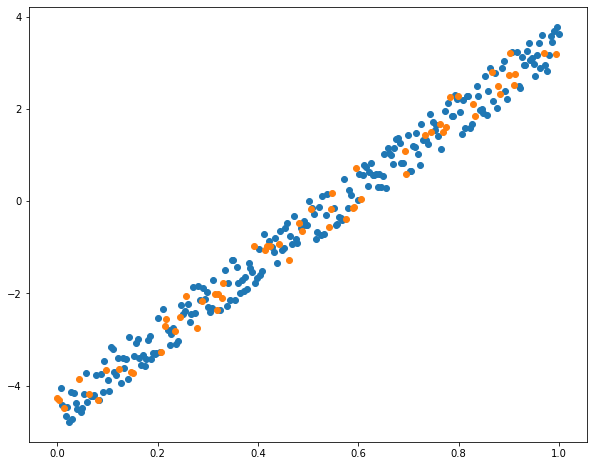

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.show()

### 开始训练

In [11]:
# plt.ion()
for epoch in range(EPOCH):
    if torch.cuda.is_available():
        x = Variable(x_train).cuda()
        y = Variable(y_train).cuda()
    else:
        x = Variable(x_train)
        y = Variable(y_train)
    out = model(x)
    loss = loss_fun(out,y)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (epoch+1)%100==0:
        print('Epoch[{}/{}],loss:{:.6f}'.format(epoch+1,EPOCH,loss.data.item()))

Epoch[100/1000],loss:0.316510
Epoch[200/1000],loss:0.302810
Epoch[300/1000],loss:0.304387
Epoch[400/1000],loss:0.302323
Epoch[500/1000],loss:0.291283
Epoch[600/1000],loss:0.280429
Epoch[700/1000],loss:0.277449
Epoch[800/1000],loss:0.267705
Epoch[900/1000],loss:0.265107
Epoch[1000/1000],loss:0.255626


### 训练结果以及拟合曲线

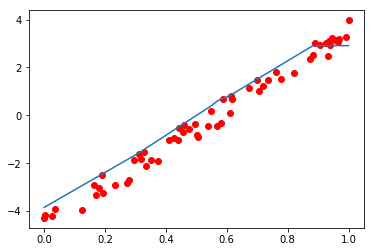

In [12]:
model.eval()
if  torch.cuda.is_available():
    x = x_test.cuda()
predict = model(x)
predict = predict.cpu().data.numpy()
plt.plot(x.cpu().numpy(),y_test.cpu().numpy(),'ro',label='original data')
plt.plot(sorted(x.cpu().numpy()),sorted(predict),label='fitting line')
plt.show()